In [12]:
from graph import RoomGraph
import loader
import matplotlib.pyplot as plt
import numpy as np
import time
import time
import pylab as pl
from IPython import display
import imageio

#### Funkcje pomocnicze

In [22]:
%matplotlib inline
def graph_to_heatmap(graph : RoomGraph):
    shape = (max(graph.walls, key=lambda x: x[0])[0] + 1, max(graph.walls, key=lambda x: x[1])[1] + 1)
    heatmap = [[0 for _ in range(shape[1])] for _ in range(shape[0])]
    for wall in graph.walls:
        heatmap[wall[0]][wall[1]] = 1
    for door in graph.doors:
        heatmap[door[0]][door[1]] = 2
    for table in graph.tables:
        heatmap[table[0]][table[1]] = 3
    for chair in graph.chairs:
        heatmap[chair[0]][chair[1]] = 4
    return heatmap

def animate_process(results, animation_step, gif_name=None):
    plt.ion()
    heatmaps = []
    image_files = []
    i = 0
    for i in range(0, len(results), animation_step):
        heatmaps.append((i + 1, graph_to_heatmap(results[i]['best'])))
    if heatmaps[-1][0] != len(results):
        heatmaps.append((len(results), graph_to_heatmap(results[-1]['best'])))
        
    _, ax = plt.subplots(figsize=(10, 10))
    
    for step, heatmap in heatmaps: 
        ax.imshow(heatmap, cmap="Set3", interpolation='nearest')
        ax.set_title(f"epoch {(step)} / {len(results)}, number of chairs: {len(results[step - 1]['best'].chairs)}")
        display.clear_output(wait=True)
        display.display(pl.gcf())
        time.sleep(1.0)

        if gif_name:
            filename = f'gif_storage/plot_{i+1}.png'
            plt.savefig(filename)
            image_files.append(filename)
            i += 1
    if gif_name:
        with imageio.get_writer(gif_name + '.gif', mode='I') as writer:
            for filename in image_files:
                image = imageio.imread(filename)
                writer.append_data(image)
    

def show_grid(grid, title):
    fig, ax = plt.subplots(figsize=(10, 10))
    heatmap = graph_to_heatmap(grid)
    ax.imshow(heatmap, cmap="plasma", interpolation='nearest')
    plt.title(title)
    plt.show()

### 1. Wygnerowania losowej planszy i zapisanie jej do pliku

In [27]:
from generate_grid import generate_grid

PATH = 'generated_grid'

# wygeneruj planszę o rozmiarze 10 na 10, ze stosunkiem 0.3 pól z '#' do wszytskich pól, zapisz plansze do pliku PATH.
generate_grid(30, 30, 0.1, PATH)

### 2. Uruchomienie algorytmu ewolucyjnego 

In [28]:
from loader import load_grid
from solution_finder import find_solutions

# załaduj graf reprezentujący plansze z pliku PATH
graph = load_grid(PATH) 

POPULATION_SIZE = 20
STEPS = 20

# uruchom algorytm ewolucyjny na planszy reprezentowanej przez graf graph, z rozmiarem populacji POPULATION_SIZE. 
# Algorytm powienien działać przez STEPS interacji.
# funkcja zwraca listę z krotkami zawierającymi stan planszy w kazdej iteracji i czas który zajeła dana iteracja.   
results = find_solutions(graph, POPULATION_SIZE, STEPS) 

epoch 1 took 1.94s | best solution: 94 chairs
epoch 2 took 2.20s | best solution: 102 chairs
epoch 3 took 2.34s | best solution: 116 chairs
epoch 4 took 2.48s | best solution: 116 chairs
epoch 5 took 2.66s | best solution: 124 chairs
epoch 6 took 2.87s | best solution: 136 chairs
epoch 7 took 3.48s | best solution: 136 chairs
epoch 8 took 3.31s | best solution: 142 chairs
epoch 9 took 3.30s | best solution: 152 chairs
epoch 10 took 3.45s | best solution: 156 chairs
epoch 11 took 3.45s | best solution: 156 chairs
epoch 12 took 3.88s | best solution: 158 chairs
epoch 13 took 3.84s | best solution: 160 chairs
epoch 14 took 4.09s | best solution: 160 chairs
epoch 15 took 4.34s | best solution: 166 chairs
epoch 16 took 4.28s | best solution: 170 chairs
epoch 17 took 4.51s | best solution: 172 chairs
epoch 18 took 4.65s | best solution: 172 chairs
epoch 19 took 5.58s | best solution: 174 chairs
epoch 20 took 4.86s | best solution: 176 chairs


### 3. Wyniki działania algorytmu

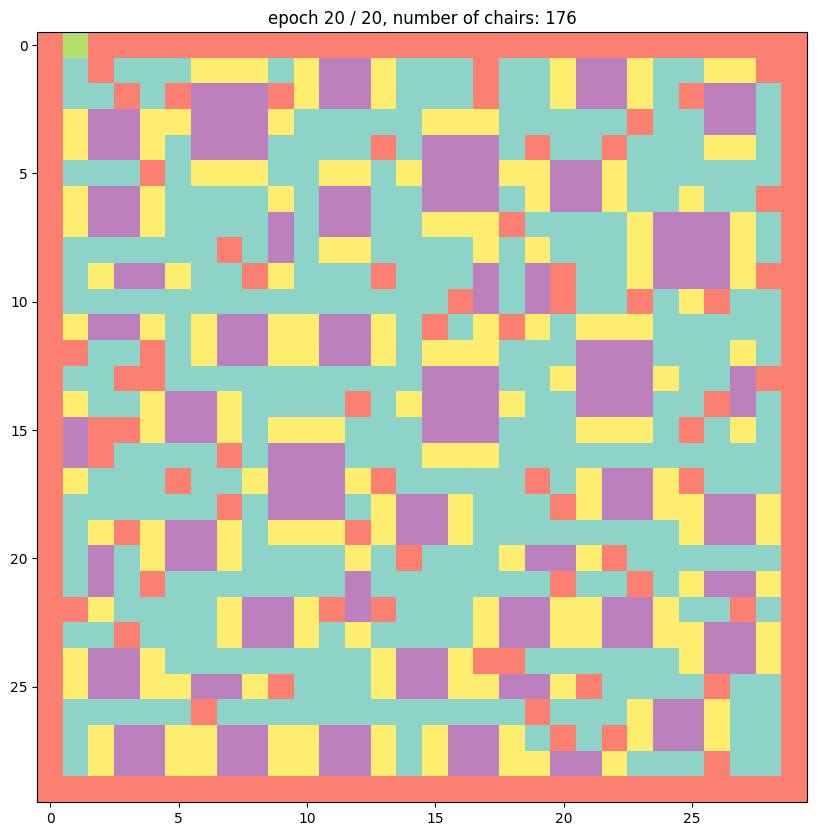

/var/folders/cq/mp5dvspx1xqc7bfwtj448kkm0000gq/T/ipykernel_75305/225247391.py:42: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


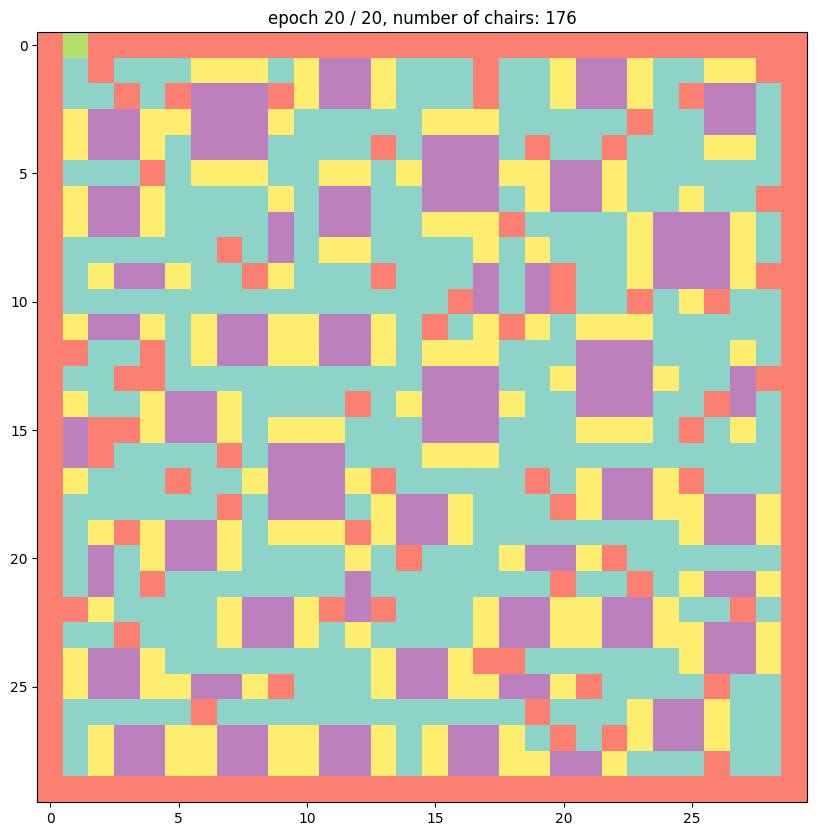

In [31]:
# uruchom animacje pokazującą jak zmienia się plansza w kolejnych iteracjach
# W celu wygenerowania gifa wystarczy podać nazwę pliku
# Jeśli nie chcemy generować gifa, wystarczy nie podawać ostatniego argumentu, bądź podać None
animate_process(results, 2, "animation")